In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

/Users/thatsmilersmiles/Downloads/ENTER/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [5]:
#load data
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
data = pd.read_csv(data_path)
data = data.sort_values(by=['input'])
display(data.describe())
X = data['input'].values.reshape(-1,1)
y = data['output'].values.reshape(-1,1)

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


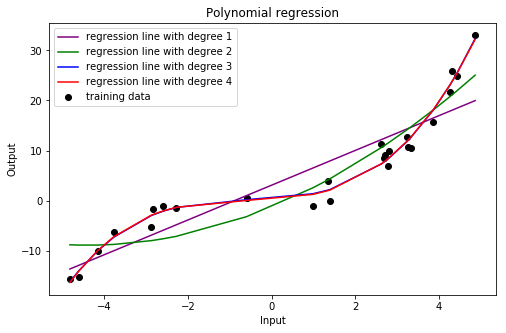

In [6]:
#a
polyreg1 = make_pipeline(PolynomialFeatures(1),LinearRegression(fit_intercept=False))
polyreg1.fit(X,y)
polyreg2 = make_pipeline(PolynomialFeatures(2),LinearRegression(fit_intercept=False))
polyreg2.fit(X,y)
polyreg3 = make_pipeline(PolynomialFeatures(3),LinearRegression(fit_intercept=False))
polyreg3.fit(X,y)
polyreg4 = make_pipeline(PolynomialFeatures(4),LinearRegression(fit_intercept=False))
polyreg4.fit(X,y)

plt.figure(figsize=(8,5))
plt.scatter(X, y, label="training data", color="black")
plt.plot(X, polyreg1.predict(X), color="purple", label="regression line with degree 1")
plt.plot(X, polyreg2.predict(X), color="green", label="regression line with degree 2")
plt.plot(X, polyreg3.predict(X), color="blue", label="regression line with degree 3")
plt.plot(X, polyreg4.predict(X), color="red", label="regression line with degree 4")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.title("Polynomial regression")
plt.show()

[24.744378032672856, 17.352926937873296, 2.7447567192524263, 2.7389111790755374]


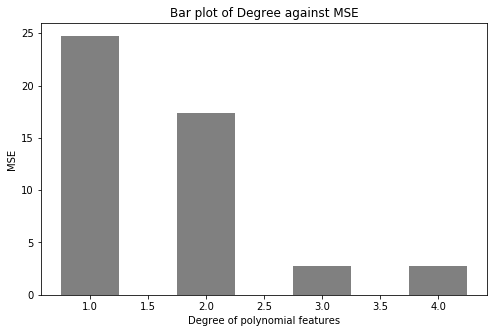

In [7]:
#b
degree = [1,2,3,4]
mse = [mean_squared_error(y, polyreg1.predict(X)), mean_squared_error(y, polyreg2.predict(X)), 
       mean_squared_error(y, polyreg3.predict(X)), mean_squared_error(y, polyreg4.predict(X))]
print(mse)
plt.figure(figsize=(8,5))
plt.bar(degree, mse, color='grey', width = 0.5) 
plt.xlabel("Degree of polynomial features") 
plt.ylabel("MSE") 
plt.title("Bar plot of Degree against MSE") 
plt.show() 

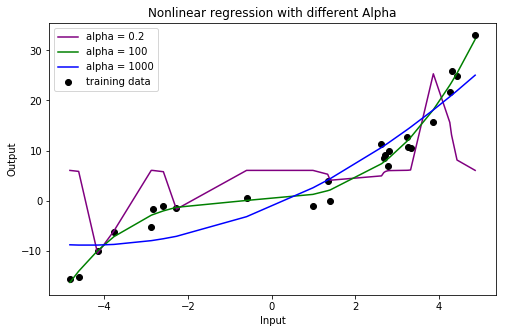

In [406]:
#d
def rbf(x,c,a):
    return np.exp(-0.5 * (x - c) ** 2 / a**2)

X_train = data['input'].values.reshape(-1,1)
y_train = data['output'].values.reshape(-1,1)
c = [-4, -2, 2, 4]
a = [0.2, 100, 1000]

#a1
rbf1 = rbf(X_train,c[0],a[0])
rbf2 = rbf(X_train,c[1],a[0])
rbf3 = rbf(X_train,c[2],a[0])
rbf4 = rbf(X_train,c[3],a[0])
phi1 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis=1)
phi1 = np.insert(phi1, 0, values = 1, axis = 1)

#a2
rbf1 = rbf(X_train,c[0],a[1])
rbf2 = rbf(X_train,c[1],a[1])
rbf3 = rbf(X_train,c[2],a[1])
rbf4 = rbf(X_train,c[3],a[1])
phi2 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis=1)
phi2 = np.insert(phi2, 0, values = 1, axis = 1)

#a3
rbf1 = rbf(X_train,c[0],a[2])
rbf2 = rbf(X_train,c[1],a[2])
rbf3 = rbf(X_train,c[2],a[2])
rbf4 = rbf(X_train,c[3],a[2])
phi3 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis=1)
phi3 = np.insert(phi3, 0, values = 1, axis = 1)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label='training data', color='black')
reg1 = LinearRegression(fit_intercept=False)
reg1.fit(phi1,y_train)
reg2 = LinearRegression(fit_intercept=False)
reg2.fit(phi2,y_train)
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(phi3,y_train)

plt.plot(X_train, reg1.predict(phi1), color="purple", label='alpha = 0.2')
plt.plot(X_train, reg2.predict(phi2), color="green", label='alpha = 100')
plt.plot(X_train, reg3.predict(phi3), color="blue", label='alpha = 1000')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.title("Nonlinear regression with different Alpha")
plt.show()